In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
 #loading the dataset
chunk_iter = pd.read_csv('/content/train.csv', chunksize=100000)
df_chunk = next(chunk_iter)


<ipython-input-170-2234121163>:3: DtypeWarning: Columns (11,13,14,15,22,23,24,25,27,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_chunk = next(chunk_iter)


In [ ]:
# first 5 rows
df_chunk.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_chunk.tail()   # last 5 rows

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
99995,1417929,93500,26366,3357,132,6,1990,NaN,NaN,2/24/1994 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,1417930,47000,1412330,3357,132,9,1990,NaN,NaN,12-02-2010 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,1417931,47000,1412330,3357,132,9,1990,NaN,NaN,5/20/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,1417934,48000,1412330,3357,132,9,1990,NaN,NaN,8/19/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99999,1417937,92500,1195271,3357,132,1,1990,NaN,NaN,3/17/1994 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_chunk.shape   # no. of .rows

(100000, 53)

**Phase 1: Understand the Data**

In [ ]:
# finding missing value
df_chunk.isnull().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,73691
UsageBand,76617
saledate,0


In [ ]:
# checking datatype of column
print(df_chunk.dtypes)

SalesID                       int64
SalePrice                     int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                  int64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

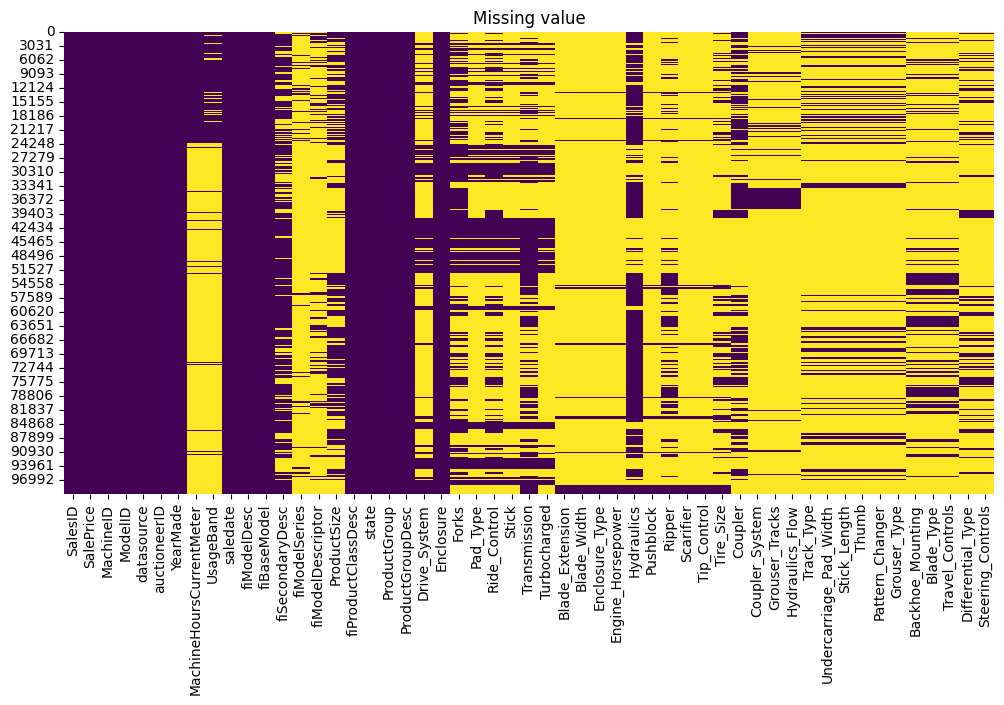

In [ ]:
# visualise missing value
plt.figure(figsize=(12,6))
sns.heatmap(df_chunk.isnull(),cbar=False, cmap='viridis')
plt.title('Missing value')
plt.show()

dark colour---no missing value   

yellow colour--- missing value

In [ ]:
# describing the numeric coloum to detect outliers
df_chunk.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,1.000000e+05,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,26309.000000
mean,1.294013e+06,32361.55013,1.067671e+06,5485.211650,129.362860,6.502580,1931.441850,4525.574062
std,7.910623e+04,23797.71391,3.947570e+05,5078.726263,4.696196,15.605157,237.261476,5878.748366
min,1.139246e+06,4750.00000,1.300000e+01,28.000000,121.000000,1.000000,1000.000000,0.000000
25%,1.252166e+06,15500.00000,1.004246e+06,3171.000000,132.000000,1.000000,1984.000000,978.000000
50%,1.292648e+06,24500.00000,1.151534e+06,3819.000000,132.000000,3.000000,1993.000000,2617.000000
75%,1.363022e+06,41000.00000,1.355657e+06,6797.000000,132.000000,4.000000,1999.000000,6188.000000
max,1.417937e+06,142000.00000,1.558285e+06,37198.000000,132.000000,99.000000,2010.000000,220893.000000


**Phase 2: Data Cleaning & Preparation**

In [ ]:
# handling missing value
# Fill numeric columns with median
df_chunk = df_chunk.fillna(df_chunk.median(numeric_only=True))

# Fill categorical columns with mode
for col in df_chunk.select_dtypes(include='object').columns:
    df_chunk[col] = df_chunk[col].fillna(df_chunk[col].mode()[0])


In [ ]:
df_chunk.isnull().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,0
saledate,0


In [ ]:
# Extract useful features (e.g., from the sale date).
df_chunk['saledate']=pd.to_datetime(df_chunk['saledate'], errors='coerce')     # correct data type
df_chunk['year']=df_chunk['saledate'].dt.year
df_chunk['month']=df_chunk['saledate'].dt.month


In [ ]:
df_chunk.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,2006-11-16,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2006.0,11.0
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,2004-03-26,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2004.0,3.0
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2004-02-26,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2004.0,2.0
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,2011-05-19,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2011.0,5.0
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,2009-07-23,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2009.0,7.0


In [ ]:
# dropping irrelevant coloums
df_chunk=df_chunk.drop(['saledate','SalesID','MachineID'], axis=1, errors='ignore')



In [ ]:
df_chunk.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month
0,66000,3157,121,3,2004,68.0,Low,521D,521,D,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2006.0,11.0
1,57000,77,121,3,1996,4640.0,Low,950FII,950,F,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2004.0,3.0
2,10000,7009,121,3,2001,2838.0,High,226,226,C,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2004.0,2.0
3,38500,332,121,3,2001,3486.0,High,PC120-6E,PC120,C,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2011.0,5.0
4,11000,17311,121,3,2007,722.0,Medium,S175,S175,C,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2009.0,7.0


In [ ]:
# Convert categorical variables using encoding techniques (e.g., one-hot, label encoding).
df_chunk=pd.get_dummies(df_chunk)

In [ ]:
df_chunk.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,year,month,UsageBand_High,UsageBand_Low,...,Travel_Controls_Finger Tip,Travel_Controls_Lever,Travel_Controls_None or Unspecified,Travel_Controls_Pedal,Differential_Type_Limited Slip,Differential_Type_No Spin,Differential_Type_Standard,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard
0,66000,3157,121,3,2004,68.0,2006.0,11.0,False,True,...,False,False,True,False,False,False,True,False,True,False
1,57000,77,121,3,1996,4640.0,2004.0,3.0,False,True,...,False,False,True,False,False,False,True,False,True,False
2,10000,7009,121,3,2001,2838.0,2004.0,2.0,True,False,...,False,False,True,False,False,False,True,False,True,False
3,38500,332,121,3,2001,3486.0,2011.0,5.0,True,False,...,False,False,True,False,False,False,True,False,True,False
4,11000,17311,121,3,2007,722.0,2009.0,7.0,False,False,...,False,False,True,False,False,False,True,False,True,False


**Phase 3: Model Building**

In [ ]:
# separating the dataset into features and target
x=df_chunk.drop('SalePrice', axis=1)
y=df_chunk['SalePrice']

In [ ]:
# splitting the dataset into training and testing data
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(100000, 4220) (80000, 4220) (20000, 4220)


In [ ]:

print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in X_train:", x_train.isnull().sum().sum())

Missing values in y_train: 0
Missing values in X_train: 58258


In [ ]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)


In [ ]:

print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in X_train:", x_train.isnull().sum().sum())

Missing values in y_train: 0
Missing values in X_train: 0


In [ ]:
# train linear regression model
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
# prediction
lr_model_prediction=lr_model.predict(x_test)


In [ ]:
# Check for negative values
print("Min of y_test:", y_test.min())
print("Min of predictions:", lr_model_prediction.min())


Min of y_test: 4750
Min of predictions: -58238.14072894868


In [ ]:
# Replace all negative predictions with 0
lr_model_prediction = np.maximum(lr_model_prediction, 0)



In [ ]:
# calculate RMSLE (Root Mean Squared Logarithmic Error)
lr_rmsle=np.sqrt(mean_squared_log_error(y_test+1, lr_model_prediction+1))
print("Linear Regression RMSLE",lr_rmsle)

Linear Regression RMSLE 0.42030937401034696


Train decision tree --- other algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_model_prediction = dt_model.predict(x_test)


# Clip negatives and calculate RMSLE
dt_model_prediction = np.maximum(dt_model_prediction, 0)
dt_rmsle = np.sqrt(mean_squared_log_error(y_test + 1, dt_model_prediction + 1))
print("Decision Tree RMSLE:", dt_rmsle)


Decision Tree RMSLE: 0.3114973565945361


Linear Regression RMSLE: 0.42030937401034696
Decision Tree RMSLE: 0.3114973565945361


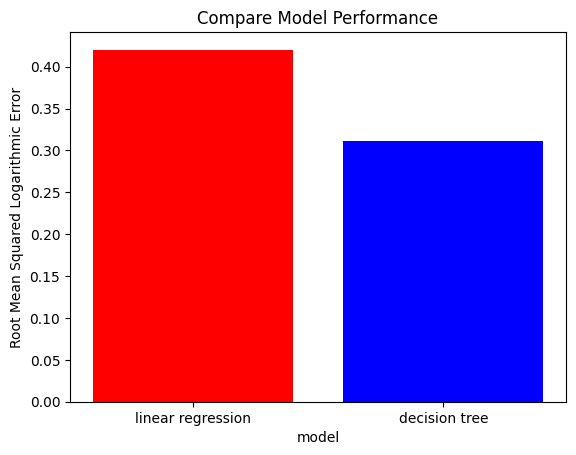

In [ ]:
# Compare Model Performance
print("Linear Regression RMSLE:", lr_rmsle)
print("Decision Tree RMSLE:", dt_rmsle)
rmsle=[lr_rmsle,dt_rmsle]
model=['linear regression','decision tree']
# ploting bar plot
plt.bar(model,rmsle,color=['red','blue'])
plt.xlabel('model')
plt.ylabel('Root Mean Squared Logarithmic Error')
plt.title('Compare Model Performance')
plt.show()

working on test data

In [ ]:
#loading test data
chunk_iter = pd.read_csv('/content/test.csv', chunksize=100000)
test_chunk = next(chunk_iter)

In [ ]:
test_chunk.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,05-03-2012 00:00,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,05-10-2012 00:00,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,05-10-2012 00:00,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,05-10-2012 00:00,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,05-10-2012 00:00,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [ ]:
test_chunk.tail()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,10/24/2012 0:00,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,10/24/2012 0:00,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,10/24/2012 0:00,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,10/24/2012 0:00,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12456,6643196,2558346,21446,149,2,2008,NaN,NaN,9/19/2012 0:00,55N2,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_chunk.isnull().sum()   # checking for missing value

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,10328
UsageBand,10623
saledate,0
fiModelDesc,0


In [ ]:
# checking datatype of column
print(df_chunk.dtypes)

SalePrice                                int64
ModelID                                  int64
datasource                               int64
auctioneerID                             int64
YearMade                                 int64
                                         ...  
Differential_Type_No Spin                 bool
Differential_Type_Standard                bool
Steering_Controls_Command Control         bool
Steering_Controls_Conventional            bool
Steering_Controls_Four Wheel Standard     bool
Length: 4221, dtype: object


In [ ]:
# handling missing value
# Fill numeric columns with median
test_chunk = test_chunk.fillna(test_chunk.median(numeric_only=True))

# Fill categorical columns with mode
for col in test_chunk.select_dtypes(include='object').columns:
    test_chunk[col] = test_chunk[col].fillna(test_chunk[col].mode()[0])

In [ ]:
test_chunk.isnull().sum()   # checking for missing value

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,0
saledate,0
fiModelDesc,0


In [ ]:
# Extract useful features (e.g., from the sale date).
test_chunk['saledate']=pd.to_datetime(test_chunk['saledate'], errors='coerce')     # correct data type
test_chunk['year']=test_chunk['saledate'].dt.year
test_chunk['month']=test_chunk['saledate'].dt.month


In [ ]:
test_chunk.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,Manual,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,Manual,Yes,Triple,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0


In [ ]:
# dropping irrelevant coloums
test_chunk=test_chunk.drop(['saledate','SalesID','MachineID'], axis=1, errors='ignore')



In [ ]:
test_chunk.head()

,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month
0,3168,121,3,1999,3688.0,Low,580G,580,G,II,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0
1,7271,121,3,1000,28555.0,High,936,936,G,II,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0
2,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,B,II,...,Manual,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0
3,1269,121,3,2006,8940.0,High,330CL,330,C,II,...,Manual,Yes,Triple,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0
4,22312,121,3,2005,2286.0,Low,650K,650,K,II,...,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional,2012.0,5.0


In [ ]:
# Convert categorical variables using encoding techniques (e.g., one-hot, label encoding).
test_chunk=pd.get_dummies(test_chunk)

In [ ]:
test_chunk.head()

,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,year,month,UsageBand_High,UsageBand_Low,UsageBand_Medium,...,Travel_Controls_Finger Tip,Travel_Controls_Lever,Travel_Controls_None or Unspecified,Travel_Controls_Pedal,Differential_Type_Limited Slip,Differential_Type_No Spin,Differential_Type_Standard,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard
0,3168,121,3,1999,3688.0,2012.0,5.0,False,True,False,...,False,False,True,False,False,False,True,False,True,False
1,7271,121,3,1000,28555.0,2012.0,5.0,True,False,False,...,False,False,True,False,False,False,True,False,True,False
2,22805,121,3,2004,6038.0,2012.0,5.0,False,False,True,...,False,False,True,False,False,False,True,False,True,False
3,1269,121,3,2006,8940.0,2012.0,5.0,True,False,False,...,False,False,True,False,False,False,True,False,True,False
4,22312,121,3,2005,2286.0,2012.0,5.0,False,True,False,...,False,False,True,False,False,False,True,False,True,False


In [ ]:
for col in test_chunk.select_dtypes(include='object').columns:     #label cncoding
    le=LabelEncoder()
    test_chunk[col]=le.fit_transform(test_chunk[col])

In [ ]:
#ensure that same coloumn as training set
test_chunk=test_chunk.reindex(columns=x.columns, fill_value=0)

In [ ]:
prediction=dt_model.predict(test_chunk)
prediction=np.maximum(prediction,0)        # to avoid any negative value

In [ ]:
#loading test data again to get sellID
chunk_iter = pd.read_csv('/content/test.csv', chunksize=100000)
test_chunk = next(chunk_iter)

In [ ]:
# creating submission datafraame
submission_df=pd.DataFrame({
    'SalesID':test_chunk['SalesID'],
    'SalePrice':prediction
})
submission_df.to_csv('test_predictions.csv', index=False, float_format='%.2f')

just exploring saved file

In [ ]:
dataframe=pd.read_csv('test_predictions.csv')
dataframe.head()

,SalesID,SalePrice
0,1227829,10500.0
1,1227844,25000.0
2,1227847,40000.0
3,1227848,93000.0
4,1227863,37000.0


In [ ]:
dataframe.tail()

,SalesID,SalePrice
12452,6643171,51000.0
12453,6643173,13250.0
12454,6643184,53000.0
12455,6643186,16500.0
12456,6643196,15000.0


In [ ]:
dataframe.shape

(12457, 2)